In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

from sklearn.model_selection import train_test_split #sklearn import does not automatically install sub packages
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [169]:
file1 = pd.read_csv('kc_house_data.csv')
house_df=file1
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [170]:
house_df['date']=house_df['date'].str.extract('(^\d*)')
house_df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [171]:
house_df['date'] = pd.to_datetime(house_df['date'], format='%Y%m%d')
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [172]:
def outliers(df, ft):
    Q1 = house_df[ft].quantile(0.25)
    Q3 = house_df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft]> upper_bound)]
    
    return ls

In [173]:
index_list = []
for x in ['price', 'bedrooms', 'bathrooms','sqft_living', 'sqft_lot','floors', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']:
    index_list.extend(outliers(house_df, x))

In [174]:
def remove (df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [175]:
house_df = remove(house_df, index_list)
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [191]:
house_numerical = house_df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built',
 'yr_renovated','sqft_living15','sqft_lot15']]
house_numerical

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,1600,0,2004,0,1410,1287


<AxesSubplot:>

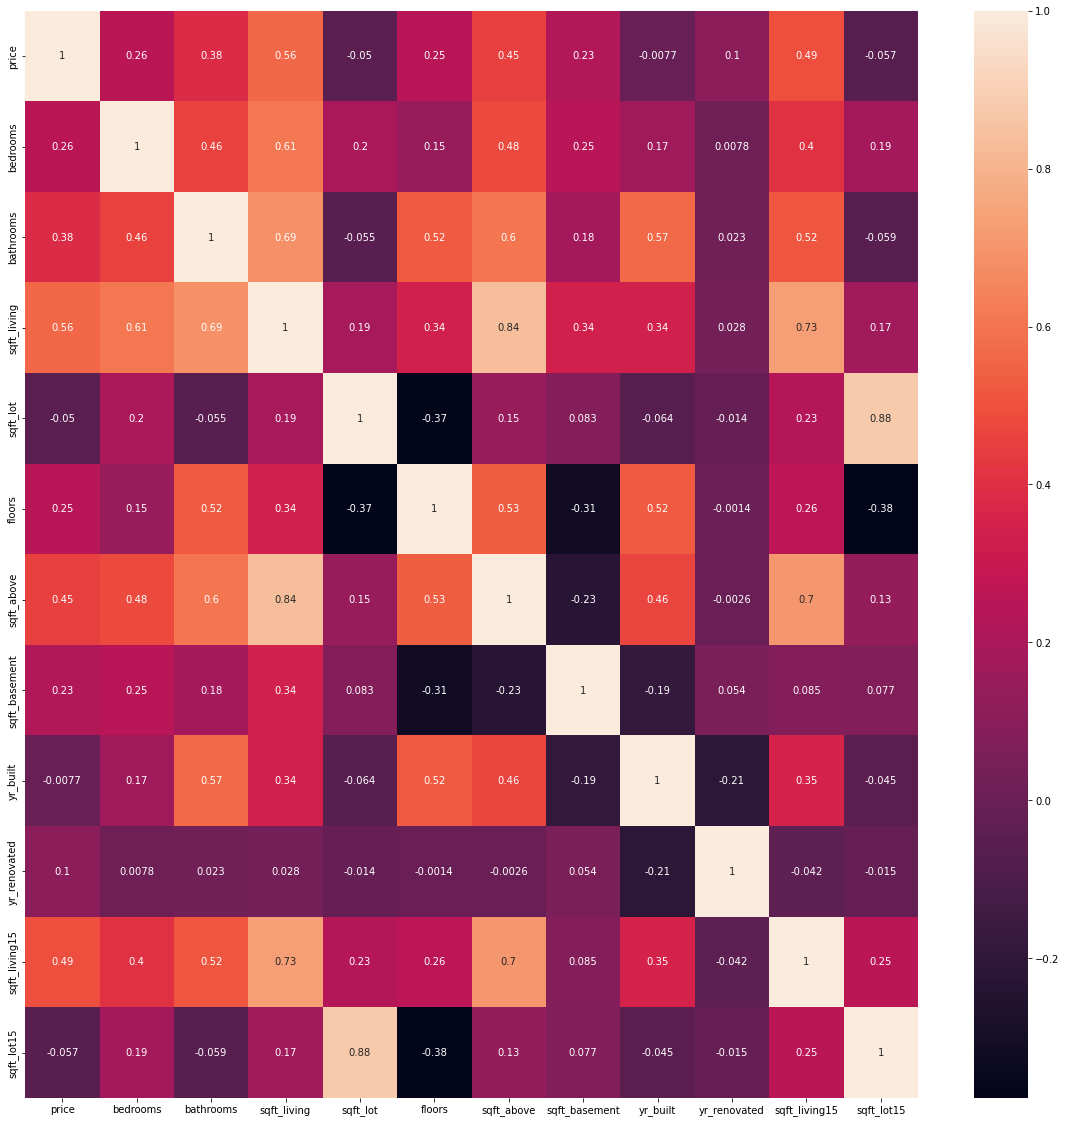

In [193]:
fig=plt.figure(figsize=(20,20))
sns.heatmap(house_numerical.corr(),annot=True)

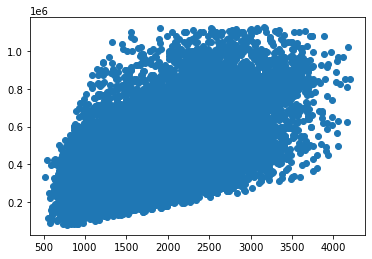

In [194]:
plt.Figure(figsize=[20,20])
plt.scatter(house_df['sqft_living'], house_df['price'])
plt.show()

In [195]:
X = house_df.drop(['id','date','price'], axis=1)

In [196]:
y =house_df['price']

In [197]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [198]:
#Standardize the data (after the data split).
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9388,2,1.00,1800,5182,1.0,0,0,3,6,900,900,1942,0,98108,47.5508,-122.300,1570,5876
18616,4,2.50,2170,11511,2.0,0,0,3,8,2170,0,1992,0,98031,47.3886,-122.188,1900,8961
3562,3,2.25,2190,7149,1.0,0,1,4,8,1240,950,1963,0,98056,47.5243,-122.204,3500,7149
9226,4,2.75,2510,12500,1.0,0,0,5,8,2050,460,1976,0,98052,47.6278,-122.110,2200,12088
5618,3,1.75,2030,13700,1.0,0,0,3,8,1630,400,1976,0,98011,47.7726,-122.197,2120,11200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,3,3.50,1590,1102,3.0,0,0,3,8,1590,0,2010,0,98103,47.6824,-122.347,1620,3166
17007,2,1.75,1480,4000,1.0,0,0,4,6,740,740,1925,0,98117,47.6916,-122.380,1060,4000
9892,3,2.50,1810,7210,1.0,0,0,5,7,1210,600,1968,0,98059,47.5067,-122.163,1770,7210
19469,4,2.50,2090,7290,1.0,0,0,5,8,1420,670,1966,0,98007,47.6240,-122.142,2110,8436


In [199]:
X_train.shape

(12030, 18)

In [200]:
X_test_scaled=std_scaler.transform(X_test)

In [201]:
#Apply linear regression.

X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     1552.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:57:11   Log-Likelihood:            -1.5664e+05
No. Observations:               12030   AIC:                         3.133e+05
Df Residuals:                   12012   BIC:                         3.134e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.567e+05    997.247    457.971      0.0

How to Detect Multicollinearity Easily

Printing and observing bivariate correlations of predictors is not good enough when evaluating the existence of multicollinearity because of potential cross correlation of three or more variables.  On the flip side, in certain cases, high correlation between variables does not result in collinearity (e.g. the VIF associated with a variable is not high.)

Instead, one should use variable inflation factor or VIF, which can be computed for each regressor by fitting an OLS model that has the regressor in question as a target variable and all other regressors as features.  If a strong relationship exists between the target (e.g. regressor in question) and at least one other regressor, the VIF will be high.  What is high?  Textbooks usually suggest 5 or 10 as a cutoff value above which the VIF score suggests the presence of multicollinearity. So which one, 5 or 10? If the dataset is very large with a lot of features, a VIF cutoff of 10 is acceptable.  Smaller datasets require a more conservative approach where the VIF cutoff may needed to be dropped to 5.  I have seen people using an even lower cutoff threshold, and the purpose of the analysis should dictate which threshold to use. 

In [202]:
x_temp = sm.add_constant(X_train)
x_temp

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9388,1.0,2,1.00,1800,5182,1.0,0,0,3,6,900,900,1942,0,98108,47.5508,-122.300,1570,5876
18616,1.0,4,2.50,2170,11511,2.0,0,0,3,8,2170,0,1992,0,98031,47.3886,-122.188,1900,8961
3562,1.0,3,2.25,2190,7149,1.0,0,1,4,8,1240,950,1963,0,98056,47.5243,-122.204,3500,7149
9226,1.0,4,2.75,2510,12500,1.0,0,0,5,8,2050,460,1976,0,98052,47.6278,-122.110,2200,12088
5618,1.0,3,1.75,2030,13700,1.0,0,0,3,8,1630,400,1976,0,98011,47.7726,-122.197,2120,11200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.0,3,3.50,1590,1102,3.0,0,0,3,8,1590,0,2010,0,98103,47.6824,-122.347,1620,3166
17007,1.0,2,1.75,1480,4000,1.0,0,0,4,6,740,740,1925,0,98117,47.6916,-122.380,1060,4000
9892,1.0,3,2.50,1810,7210,1.0,0,0,5,7,1210,600,1968,0,98059,47.5067,-122.163,1770,7210
19469,1.0,4,2.50,2090,7290,1.0,0,0,5,8,1420,670,1966,0,98007,47.6240,-122.142,2110,8436


In [203]:

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.shape[1])]
vif["features"] = x_temp.columns
vif.round(1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,4687249.4,const
1,1.7,bedrooms
2,3.0,bathrooms
3,inf,sqft_living
4,4.6,sqft_lot
5,2.7,floors
6,1.1,waterfront
7,1.2,view
8,1.3,condition
9,2.5,grade


sqft_lot15 and sqft_lot are strongly correlated 
sqft_above and sqft_living are strongly correlated

In [219]:
#Dropping correlated values 
house_numerical.drop(columns=["sqft_lot15","sqft_above"], inplace=True)
house_numerical

C:\Users\User\AppData\Local\Temp\ipykernel_24456\3433130124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_numerical.drop(columns=["sqft_lot15","sqft_above"], inplace=True)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,yr_renovated,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,0,1955,0,1340
1,538000.0,3,2.25,2570,7242,2.0,400,1951,1991,1690
2,180000.0,2,1.00,770,10000,1.0,0,1933,0,2720
3,604000.0,4,3.00,1960,5000,1.0,910,1965,0,1360
4,510000.0,3,2.00,1680,8080,1.0,0,1987,0,1800
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,2009,0,1530
21609,400000.0,4,2.50,2310,5813,2.0,0,2014,0,1830
21610,402101.0,2,0.75,1020,1350,2.0,0,2009,0,1020
21611,400000.0,3,2.50,1600,2388,2.0,0,2004,0,1410


<AxesSubplot:>

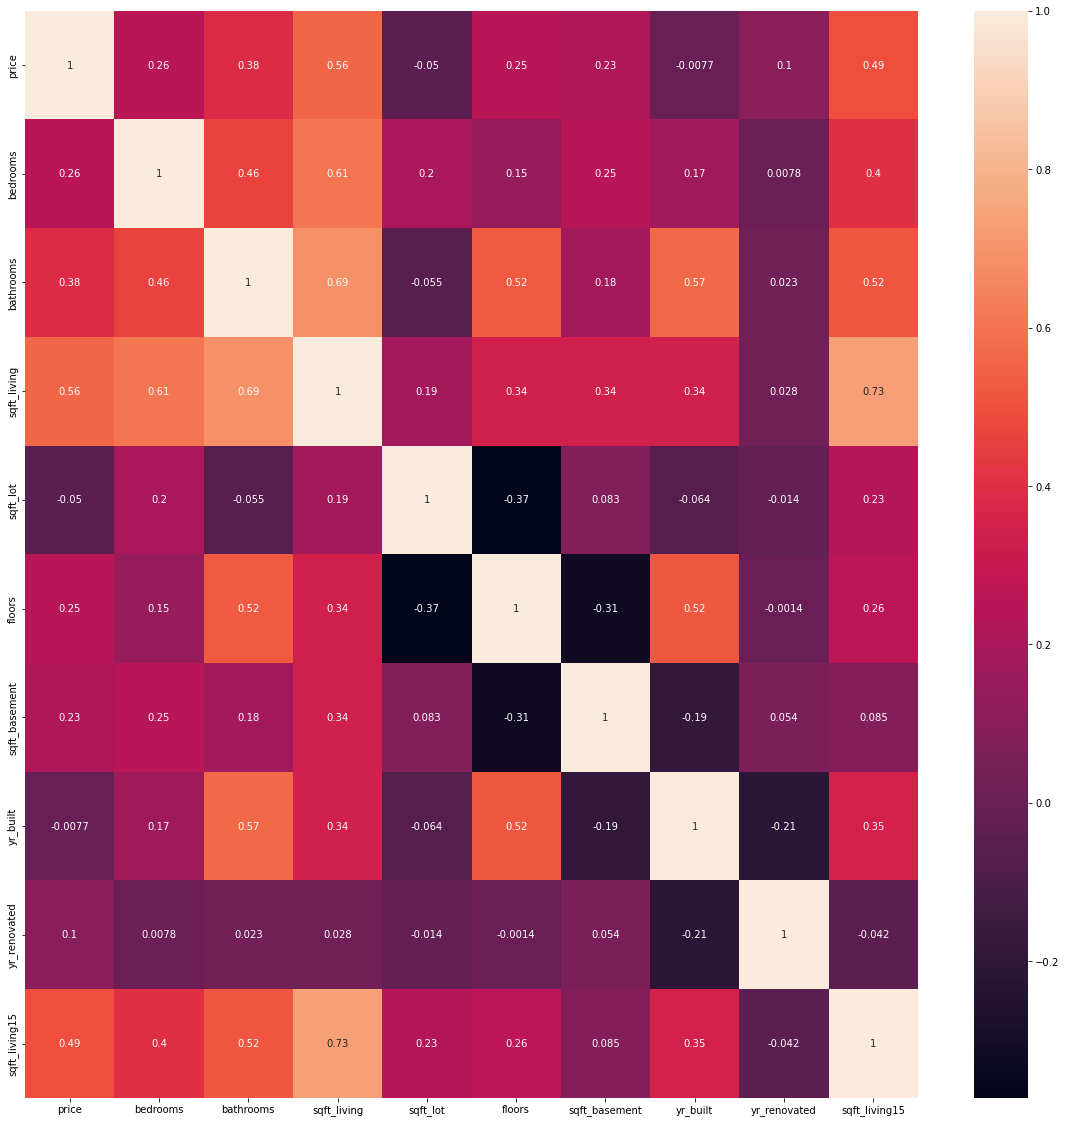

In [220]:
fig=plt.figure(figsize=(20,20))
sns.heatmap(house_numerical.corr(),annot=True)

In [221]:
#Linear Regression
# X-y split (y is the target variable, which is the total claim amount)
X=house_df.drop('price', axis=1)
y=house_df.price

In [222]:
X=X._get_numeric_data()
X

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,3,1.00,1180,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340
1,3,2.25,2570,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690
2,2,1.00,770,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720
3,4,3.00,1960,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360
4,3,2.00,1680,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1530
21609,4,2.50,2310,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362,1830
21610,2,0.75,1020,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299,1020
21611,3,2.50,1600,2.0,0,0,3,8,0,2004,0,98027,47.5345,-122.069,1410


In [223]:
#Train-test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [224]:
#Standardize the data (after the data split).
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [225]:
X_train.shape

(12030, 15)

In [226]:
X_test_scaled=std_scaler.transform(X_test)

In [227]:
#Apply linear regression.
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1676.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:14:46   Log-Likelihood:            -1.5684e+05
No. Observations:               12030   AIC:                         3.137e+05
Df Residuals:                   12014   BIC:                         3.138e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.567e+05   1013.712    450.533      0.0

How Do I Interpret the P-Values in Linear Regression Analysis?

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

In the output, we can see that the predictor variables are significant because both of their p-values are 0.000. However, the p-value for x9 (0.229 ) is greater than the common alpha level of 0.05, which indicates that it is not statistically significant.
Null Hypothesis : This X variable has no effect on the Y variable i.e H₀: b=0

Alternate Hypothesis: This X variable has effect on the Y variable i.e
Null hypothesis is only accepted if the p-value is greater than the value of alpha/2. As we can see from the table above, all the p values are less than 0.05/2 ( if we take a 95% confidence interval). This means the p value lies somewhere in the rejecting region and therefore, we can reject the null hypothesis. Thus, all of our x variables are important in defining the y variable. And, the coefficient of the x variables are statistically significant and are not there just to fit the data to the model.

In [228]:
house_new=house_df.drop('sqft_basement', axis=1)
house_new

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,2014-10-13,221900.0,3,1.00,1180,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340
1,2014-12-09,538000.0,3,2.25,2570,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,1690
2,2015-02-25,180000.0,2,1.00,770,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720
3,2014-12-09,604000.0,4,3.00,1960,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360
4,2015-02-18,510000.0,3,2.00,1680,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,3.0,0,0,3,8,2009,0,98103,47.6993,-122.346,1530
21609,2015-02-23,400000.0,4,2.50,2310,2.0,0,0,3,8,2014,0,98146,47.5107,-122.362,1830
21610,2014-06-23,402101.0,2,0.75,1020,2.0,0,0,3,7,2009,0,98144,47.5944,-122.299,1020
21611,2015-01-16,400000.0,3,2.50,1600,2.0,0,0,3,8,2004,0,98027,47.5345,-122.069,1410


In [229]:
#Linear Regression
# X-y split (y is the target variable, which is the total claim amount)
X=house_new.drop('price', axis=1)
y=house_new.price

In [230]:
X=X._get_numeric_data()
X

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,3,1.00,1180,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340
1,3,2.25,2570,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,1690
2,2,1.00,770,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720
3,4,3.00,1960,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360
4,3,2.00,1680,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,0,3,8,2009,0,98103,47.6993,-122.346,1530
21609,4,2.50,2310,2.0,0,0,3,8,2014,0,98146,47.5107,-122.362,1830
21610,2,0.75,1020,2.0,0,0,3,7,2009,0,98144,47.5944,-122.299,1020
21611,3,2.50,1600,2.0,0,0,3,8,2004,0,98027,47.5345,-122.069,1410


In [231]:
#Train-test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [232]:
#Standardize the data (after the data split).
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [233]:
X_train.shape

(12030, 14)

In [234]:
X_test_scaled=std_scaler.transform(X_test)

In [235]:
#Apply linear regression.
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1795.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:23:38   Log-Likelihood:            -1.5684e+05
No. Observations:               12030   AIC:                         3.137e+05
Df Residuals:                   12015   BIC:                         3.138e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.567e+05   1013.730    450.525      0.0

R-squared is possibly the most important measurement produced by this summary. R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables.
The F-statistic in linear regression is comparing your produced linear model for your variables against a model that replaces your variables’ effect to 0, to find out if your group of variables are statistically significant. To interpret this number correctly, using a chosen alpha value and an F-table is necessary. Prob (F-Statistic) uses this number to tell you the accuracy of the null hypothesis, or whether it is accurate that your variables’ effect is 0. In this case, it is telling us 0.00107% chance of this. Log-likelihood is a numerical signifier of the likelihood that your produced model produced the given data. It is used to compare coefficient values for each variable in the process of creating the model. AIC and BIC are both used to compare the efficacy of models in the process of linear regression, using a penalty system for measuring multiple variables. These numbers are used for feature selection of variables.


The Intercept is the result of our model if all variables were tuned to 0. In the classic ‘y = mx+b’ linear formula, it is our b, a constant added to explain a starting value for our line.

Beneath the intercept are our variables. Remember our formula? ‘Lottery ~ Region + Literacy + Wealth’ Here we see our dependent variables represented. But why are there four different versions of Region when we only input one? Simply put, the formula expects continuous values in the form of numbers. By inputting region with data points as strings, the formula separates each string into categories and analyzes the category separately. Formatting your data ahead of time can help you organize and analyze this properly.

Our first informative column is the coefficient. For our intercept, it is the value of the intercept. For each variable, it is the measurement of how change in that variable affects the independent variable. It is the ‘m’ in ‘y = mx + b’ One unit of change in the dependent variable will affect the variable’s coefficient’s worth of change in the independent variable. If the coefficient is negative, they have an inverse relationship. As one rises, the other falls.

Our std error is an estimate of the standard deviation of the coefficient, a measurement of the amount of variation in the coefficient throughout its data points. The t is related and is a measurement of the precision with which the coefficient was measured. A low std error compared to a high coefficient produces a high t statistic, which signifies a high significance for your coefficient.

P>|t| is one of the most important statistics in the summary. It uses the t statistic to produce the p value, a measurement of how likely your coefficient is measured through our model by chance. The p value of 0.378 for Wealth is saying there is a 37.8% chance the Wealth variable has no affect on the dependent variable, Lottery, and our results are produced by chance. Proper model analysis will compare the p value to a previously established alpha value, or a threshold with which we can apply significance to our coefficient. A common alpha is 0.05, which few of our variables pass in this instance.

[0.025 and 0.975] are both measurements of values of our coefficients within 95% of our data, or within two standard deviations. Outside of these values can generally be considered outliers.

Omnibus describes the normalcy of the distribution of our residuals using skew and kurtosis as measurements. A 0 would indicate perfect normalcy. Prob(Omnibus) is a statistical test measuring the probability the residuals are normally distributed. A 1 would indicate perfectly normal distribution. Skew is a measurement of symmetry in our data, with 0 being perfect symmetry. Kurtosis measures the peakiness of our data, or its concentration around 0 in a normal curve. Higher kurtosis implies fewer outliers.

Durbin-Watson is a measurement of homoscedasticity, or an even distribution of errors throughout our data. Heteroscedasticity would imply an uneven distribution, for example as the data point grows higher the relative error grows higher. Ideal homoscedasticity will lie between 1 and 2. Jarque-Bera (JB) and Prob(JB) are alternate methods of measuring the same value as Omnibus and Prob(Omnibus) using skewness and kurtosis. We use these values to confirm each other. Condition number is a measurement of the sensitivity of our model as compared to the size of changes in the data it is analyzing. Multicollinearity is strongly implied by a high condition number. Multicollinearity a term to describe two or more independent variables that are strongly related to each other and are falsely affecting our predicted variable by redundancy.




In [237]:
from sklearn.preprocessing import MinMaxScaler
x = house_numerical['sqft_living'].values.reshape(-1,1)
scaler = MinMaxScaler()
print(scaler.fit(house_numerical))

MinMaxScaler()


In [238]:
MinMaxScaler()

MinMaxScaler()

bathrooms,bedrooms,floors transform to categorcal and then encode